In [45]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *

In [46]:
CYCLE_LENGTH = 10 # length of the cycles to fit onto the graph

In [47]:
g = graphs.Balaban10Cage(embedding=1)

In [48]:
cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]

In [49]:
# solution = [
#     [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0],
#     [22, 23, 24, 51, 50, 67, 66, 33, 32, 31, 22],
#     [8, 9, 10, 19, 18, 17, 16, 25, 26, 27, 8],
#     [20, 45, 44, 43, 42, 41, 40, 39, 38, 21, 20],
#     [0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0],
#     [0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0],
#     [11, 12, 41, 42, 59, 58, 49, 50, 51, 52, 11],
#     [5, 6, 7, 8, 27, 28, 69, 68, 39, 40, 5],
#     [7, 48, 47, 14, 15, 36, 35, 34, 9, 8, 7],
#     [23, 62, 61, 60, 59, 42, 43, 26, 25, 24, 23],
#     [3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3],
#     [18, 19, 20, 21, 22, 31, 30, 29, 56, 57, 18],
#     [26, 43, 44, 65, 64, 55, 56, 29, 28, 27, 26],
#     [1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1],
#     [2, 53, 54, 37, 36, 15, 16, 17, 4, 3, 2] ,
# ]
solution = [
    [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0], 
    [0, 61, 62, 23, 22, 31, 30, 29, 28, 69, 0], 
    [0, 69, 68, 67, 66, 65, 44, 45, 46, 1, 0], 
    [1, 46, 47, 48, 49, 50, 51, 52, 53, 2, 1], 
    [4, 17, 16, 25, 24, 23, 62, 63, 6, 5, 4], 
]

In [50]:
# only valid cycles and no duplicates edges
edges = set()
for c in solution:
    for i in range(CYCLE_LENGTH):
        if (c[i], c[i + 1]) in edges:
            print("Duplicate edge", c[i], c[i + 1])
        edges.add((c[i], c[i + 1]))
    assert c in cycles

In [51]:
# print cycles with the same vertex set in the solution
for i, c1 in enumerate(solution):
    for j, c2 in enumerate(solution):
        if i == j:
            continue
        if list(reversed(c1)) == c2:
            continue
        if set(c1) == set(c2):
            print(c1, c2)

In [52]:
def x_in_y(query, base):
    try:
        l = len(query)
    except TypeError:
        l = 1
        query = type(base)((query,))

    for i in range(len(base)):
        if base[i:i+l] == query:
            return True
    return False

# test cases 
assert x_in_y((1, 2, 3), (1, 2, 3, 4))
assert x_in_y((1, 2, 3), (4, 1, 2, 3))
assert not x_in_y((1, 2, 3), (1, 2, 4, 3))
assert x_in_y([0, 61, 60], [0, 61, 60, 59, 42, 41, 40, 39, 68, 69, 0])

In [53]:
# make sure if vertices i, j, k occur in the solution, k, j, i don't
for c in solution:
    c = c.copy() + [c[1]]
    for i in range(CYCLE_LENGTH):
        for c2 in solution:
            c2 = c2.copy() + [c2[1]]
            if x_in_y([c[i + 2], c[i + 1], c[i]], c2):
                print("Found", c[i], c[i + 1], c[i + 2], "in", c2)

# Tests for mixed cycle length fittings:

In [54]:
mixed = [
    [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0],
    [22, 23, 24, 51, 50, 67, 66, 33, 32, 31, 22],
    [15, 16, 25, 26, 43, 42, 59, 60, 35, 36, 15],
    [5, 6, 63, 62, 23, 22, 21, 38, 39, 40, 5],
    [7, 48, 47, 14, 15, 36, 37, 38, 21, 20, 19, 10, 9, 8, 7],
    [0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0],
    [6, 7, 8, 27, 28, 69, 68, 39, 38, 37, 54, 55, 64, 63, 6],
    [1, 46, 45, 20, 21, 22, 31, 30, 29, 56, 55, 54, 53, 2, 1],
    [18, 19, 20, 45, 44, 65, 64, 55, 56, 57, 18],
    [3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3],
    [9, 10, 11, 52, 53, 54, 37, 36, 35, 34, 9],
    [0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0],
    [4, 17, 18, 57, 58, 49, 48, 7, 6, 5, 4],
    [23, 62, 61, 60, 59, 58, 57, 56, 29, 28, 27, 26, 25, 24, 23],
    [11, 12, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 11],
    [10, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
    [2, 53, 52, 51, 24, 25, 16, 17, 4, 3, 2],
    [8, 9, 34, 33, 66, 65, 44, 43, 26, 27, 8],
    [39, 68, 67, 50, 49, 58, 59, 42, 41, 40, 39],
]

In [55]:
len(mixed)

19

In [56]:
max([len(c) - 1 for c in mixed])

14

In [57]:
sum([len(c) - 1 for c in mixed])

210

In [58]:
len([c for c in mixed if len(c) == 11])

14

In [59]:
vertex_uses = [0] * 70
for c in mixed:
    for v in c[:-1]:
        vertex_uses[v] += 1
print(vertex_uses)
if all([v == 3 for v in vertex_uses]):
    print("All vertices used thrice")

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
All vertices used thrice


In [60]:
# convert edges list to adjacency list
adjacency_list = [[] for _ in range(70)]
for e in g.edges():
    adjacency_list[e[0]].append(e[1])
    adjacency_list[e[1]].append(e[0])

# check if every edge is used exactly once by removing them from the adjacency list
for c in mixed:
    for i in range(len(c) - 1):
        if c[i + 1] not in adjacency_list[c[i]]:
            print("Edge", c[i], c[i + 1], "not in adjacency list")
        adjacency_list[c[i]].remove(c[i + 1])
if all([len(v) == 0 for v in adjacency_list]):
    print("All edges used exactly once")

All edges used exactly once


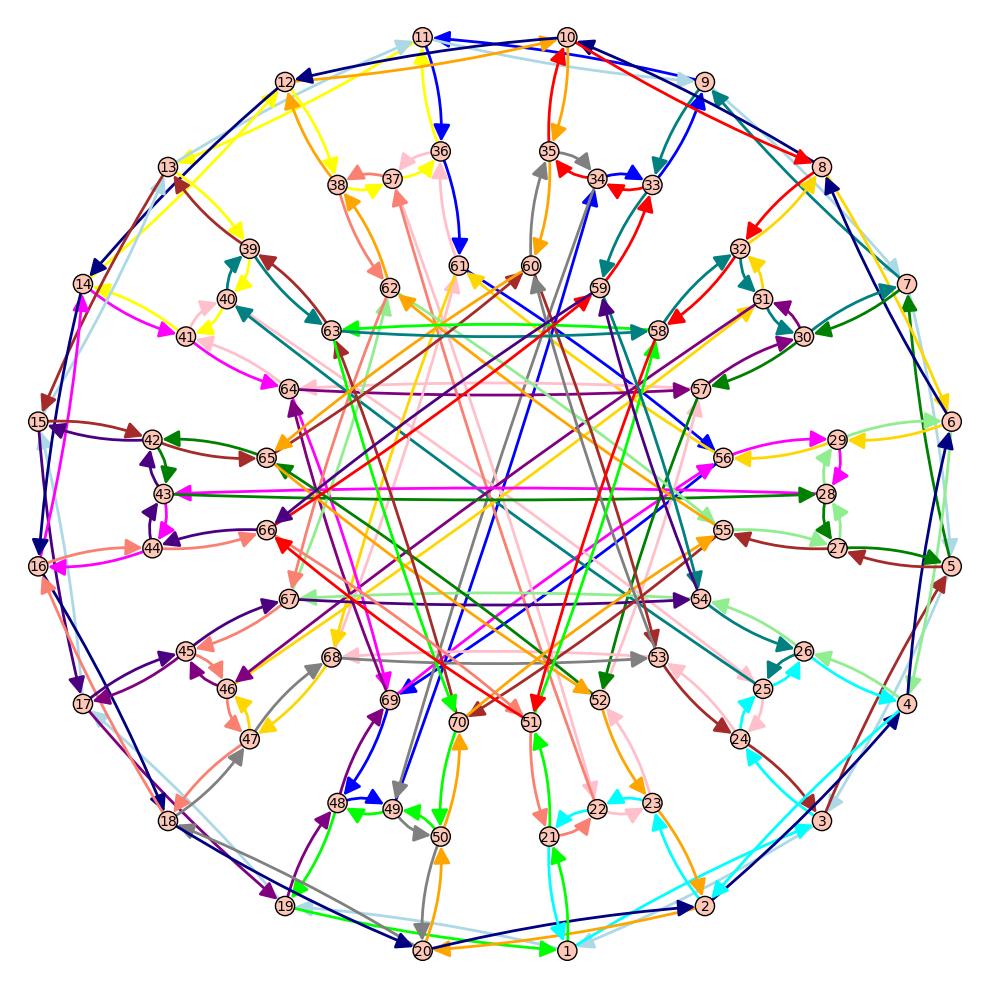

In [61]:
from math import pi, cos, sin

embedding = 1 # 1 or 2
g_directed = graphs.Balaban10Cage(embedding=embedding).to_directed()

def is_in_cycle(e, cycle):
    try:
        i = cycle.index(e[0])
        j = cycle.index(e[1])

        if i + 1 == j or (i == len(cycle) - 2 and j == 0):
            return True
        else:
            return False
    except ValueError:
        return False

for e in g_directed.edges():
    g_directed.set_edge_label(e[0], e[1], 0)
    for i, c in enumerate(mixed):
        if is_in_cycle(e, c):
            g_directed.set_edge_label(e[0], e[1], i + 1)

### CHANGE EMBEDDING LAYOUT ###
pos = g_directed.get_pos()
relabels = {}

inner_vertices = [2, 48, 27, 31, 38, 42, 49, 53, 32, 8, 43, 21, 54, 58, 7, 3, 22, 26, 59, 37]
new_labels = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
for i, v in enumerate(inner_vertices):
    angle = 2 * pi * (i + 5.5) / len(inner_vertices)
    pos[v] = (3 * cos(angle), 3 * sin(angle))
    relabels[v] = new_labels[i]

indented_vertices = [5, 24, 35, 46, 29, 40, 51, 34, 45, 56]
new_labels = [28, 31, 34, 37, 40, 43, 46, 49, 22, 25]
for i, v in enumerate(indented_vertices):
    angle = 2 * pi * i / len(indented_vertices)
    pos[v] = (4.3 * cos(angle), 4.3 * sin(angle))
    relabels[v] = new_labels[i]

middle_vertices = [1, 47, 28, 30, 39, 41, 50, 52, 33, 9, 44, 20, 55, 57, 6, 4, 23, 25, 60, 36]
new_labels = [36, 38, 39, 41, 42, 44, 45, 47, 48, 50, 21, 23, 24, 26, 27, 29, 30, 32, 33, 35]
for i, v in enumerate(middle_vertices):
    angle = 2 * pi * (i + 5.5) / len(middle_vertices)
    pos[v] = (4.5 * cos(angle), 4.5 * sin(angle))
    relabels[v] = new_labels[i]

outer_vertices = [0, 14, 69, 13, 68, 12, 67, 11, 66, 10, 65, 19, 64, 18, 63, 17, 62, 16, 61, 15,]
new_labels = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, v in enumerate(outer_vertices):
    angle = 2 * pi * (i + 5.5) / len(outer_vertices)
    pos[v] = (6 * cos(angle), 6 * sin(angle))
    relabels[v] = new_labels[i]

g_directed.set_pos(pos)
g_directed.relabel(relabels, inplace=True)
### CHANGE EMBEDDING LAYOUT ###

g_directed.plot(edge_colors=g_directed._color_by_label({
    0: "black", 
    1: "blue", 
    2: "purple", 
    3: "red", 
    4: "green", 
    5: "orange", 
    6: "yellow",
    7: "brown",
    8: "pink",
    9: "cyan",
    10: "magenta",
    11: "grey",
    12: "lightblue",
    13: "lightgreen",
    14: "teal",
    15: 'salmon',
    16: 'navy',
    17: 'gold',
    18: 'lime',
    19: 'indigo',
    20: 'maroon',
    21: 'olive',
}), vertex_size=70 if embedding == 2 else 1000).show(figsize=(10, 10))